In [1]:
import sys
from pathlib import Path
from addict import Dict as Adict
import pandas as pd
import seaborn as sns
import mdtraj as md
from natsort import natsorted

sys.path.insert(0, '/home/rzhu/Desktop/projects/kinase_analysis/src/')
from funcs_featurise import *
from funcs_db_assign import *
from funcs_indices import *
from funcs_plotting import *
from funcs_sample import *
from TrajData import TrajData
from MSMStudy import MSMStudy

In [2]:
plt.rcParams['xtick.labelsize'] = 14  # Font size for x-tick labels
plt.rcParams['ytick.labelsize'] = 14  # Font size for y-tick labels
plt.rcParams['legend.fontsize'] = 16  # Font size for legend
plt.rcParams['axes.labelsize'] = 18   # Font size for x-label and y-label
plt.rcParams['axes.titlesize'] = 18   # Font size for title

In [3]:
protein = 'abl'
key = 'abl-pdb-50ps' # Dataset key 
study = 'with_prior' # where the results are saved
data_path = Path(f'/home/rzhu/Desktop/projects/kinase_analysis/data') # base dir

hps_df = pd.read_csv(data_path/f'{protein}'/'msm'/f'{study}'/'hps.csv')
TD = TrajData(protein = protein)
TD.add_dataset(rtraj_dir = Path(f'/arc/abl_processed/'), 
               ftraj_dir= data_path / f'{protein}'/ f'{key}' / 'ftrajs',
               dt=0.05,
               key=key)
study = MSMStudy(hps_table = hps_df,
                 traj_data = TD,
                 wk_dir = data_path/f'{protein}'/'msm'/f'{study}')
study.observation

Setting dataset <abl-pdb-50ps>. 
Number of raw trajectories: 749



,hp_id,time_consumed,is_sparse,ev_1,ev_2,ev_3,ev_4,ev_5,ev_6,ev_7,...,vamp2_std_2,vamp2_std_3,vamp2_std_4,vamp2_std_5,vamp2_std_6,vamp2_std_7,vamp2_std_8,vamp2_std_9,vamp2_std_10,vamp2_std_11
0,1,1074.410517,False,1.0,0.999890,0.999787,0.999782,0.999431,0.999369,0.997438,...,0.000140,0.000156,0.000186,0.000216,0.000257,0.000260,0.000290,0.000322,0.000335,0.003066
1,2,1013.094291,False,1.0,0.999886,0.999787,0.999762,0.999428,0.999368,0.997492,...,0.000135,0.000173,0.000192,0.000191,0.000224,0.000230,0.000256,0.000274,0.000279,0.003603
2,3,1017.254637,False,1.0,0.999891,0.999773,0.999725,0.999414,0.999363,0.997478,...,0.000178,0.000186,0.000219,0.000225,0.000256,0.000261,0.000279,0.000296,0.000310,0.000672
3,4,984.530003,False,1.0,0.999879,0.999758,0.999714,0.999405,0.999334,0.997464,...,0.000121,0.000171,0.000287,0.000222,0.000255,0.000262,0.000287,0.000306,0.000309,0.001657
4,5,3786.938161,False,1.0,0.999802,0.999065,0.998065,0.997963,0.997724,0.997167,...,0.000023,0.000032,0.000200,0.000305,0.000257,0.000259,0.000303,0.000339,0.000356,0.000374


In [4]:
study.hps_table

,hp_id,datasets,features,dt_out,time_cutoff,tica_lag_time,tica_stride,tica_dim,tica_kinetic_map,cluster_n,cluster_stride,cluster_max_iter,seed,markov_lag_time,markov_count_mode,markov_count_prior,msm_mode
0,1,abl-pdb-50ps,dbdist dbdihed achelix aloop,0.05,100,1,1000,20,True,1000,1000,1000,42,10,effective,True,bayesian
1,2,abl-pdb-50ps,dbdist dbdihed achelix aloop,0.05,100,1,1000,20,True,1000,1000,1000,42,20,effective,True,bayesian
2,3,abl-pdb-50ps,dbdist dbdihed achelix aloop,0.05,100,1,1000,20,True,1000,1000,1000,42,50,effective,True,bayesian
3,4,abl-pdb-50ps,dbdist dbdihed achelix aloop,0.05,100,1,1000,20,True,1000,1000,1000,42,100,effective,True,bayesian
4,5,abl-pdb-50ps,dbdist dbdihed achelix aloop,0.05,100,1,1000,20,True,2000,1000,1000,42,100,effective,True,bayesian
5,6,abl-pdb-50ps,dbdist dbdihed achelix aloop,0.05,100,1,1000,20,True,5000,1000,1000,42,100,effective,True,bayesian


In [5]:
study.set_hp_id(4)

Set dataset abl-pdb-50ps stride to 1
Loading MSM model id 4 from /home/rzhu/Desktop/projects/kinase_analysis/data/abl/msm/with_prior/4
{'hp_id': 4, 'datasets': 'abl-pdb-50ps', 'features': 'dbdist dbdihed achelix aloop', 'dt_out': 0.05, 'time_cutoff': 100, 'tica_lag_time': 1, 'tica_stride': 1000, 'tica_dim': 20, 'tica_kinetic_map': True, 'cluster_n': 1000, 'cluster_stride': 1000, 'cluster_max_iter': 1000, 'seed': 42, 'markov_lag_time': 100, 'markov_count_mode': 'effective', 'markov_count_prior': True, 'msm_mode': 'bayesian'}
Loading trajectories...
Loading models...
Done


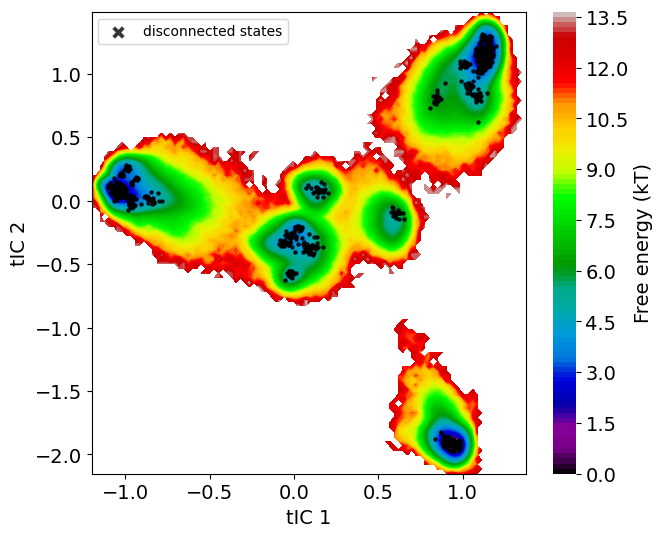

In [33]:
# Free energy surface with microstates 
plot_fe(traj_all=study.ttraj_cat,
        traj_weights = np.concatenate(study.traj_weights, axis=0),
        c_centers=study.kmeans_centers[study.connected_states, :],
        c_centers_s=20,
        d_centers=study.kmeans_centers[study.disconnected_states, :],
        d_centers_s=30,
        savedir=study.fig_dir/'free_energy.svg'
        )

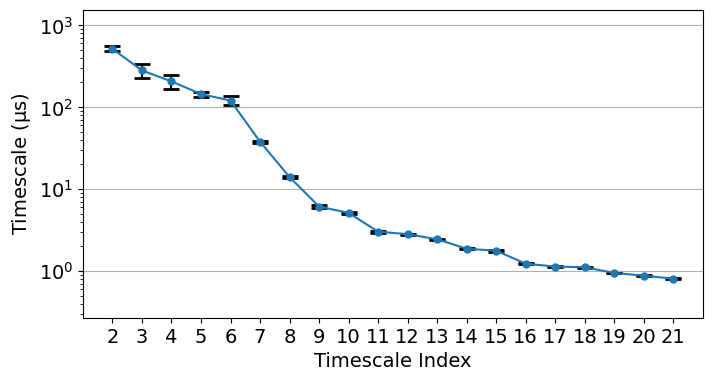

In [52]:
# Timescales 
plot_ts(timescales=study.baymsm_mod.timescales()[1], 
        #timescales=study.msm_mod.timescales(),
        n_ts = 20, 
        dt = study.hp_dict.dt_out, 
        savedir = study.fig_dir/'timescales.svg')

### Coarse-grain with PCCA

In [8]:
study.run_pcca(6)

/home/rzhu/Desktop/projects/kinase_analysis/src/funcs_plotting.py:92: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(c_centers[state_assignment == i, dim_1], c_centers[state_assignment == i, dim_2],


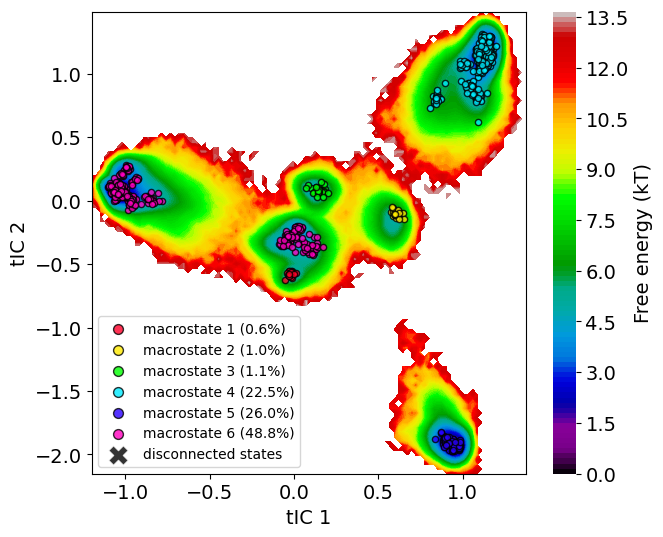

In [37]:
# Free energy surface with microstates colored by PCCA states
plot_fe(traj_all=study.ttraj_cat,
        traj_weights = np.concatenate(study.traj_weights, axis=0),
        c_centers=study.kmeans_centers[study.connected_states, :],
        c_centers_s=80,
        state_assignment=study.pcca_mod.assignments,
        n_states=study.pcca_n,
        state_population=study.pcca_mod.coarse_grained_stationary_probability,
        linewidth=1,
        d_centers=study.kmeans_centers[study.disconnected_states, :],
        d_centers_s=30,
        d_centers_marker='X',
        legend_marker_sizes=[200, 200, 200, 200, 200, 200, 200],
        savedir = study.fig_dir/'pcca.svg')

In [45]:
# I may want to show the crystal structures in the free energy surface
# I load the crystals and featurise them here

crystal_files = natsorted([str(f) for f in Path(f"/arc/human_{protein}/").glob("kinoml*.pdb")])
print('Number of crystal structures:', len(crystal_files))

frames = [] 
for crystal in crystal_files:
    sample_frame = md.load(crystal)
    sample_frame = sample_frame.atom_slice(sample_frame.top.select('mass>1.1'))
    frames.append(sample_frame)
crystals = md.join(frames)
crystals = crystals.superpose(crystals, 0)

featurisers = [dbdist_featuriser, dbdihed_featuriser, aloop_featuriser, achelix_featuriser]
c_ftrajs_dict = {f.__name__.split('_')[0]:[f(traj=crystals, protein=protein)] for f in featurisers}
c_ftrajs, _ = TD.prepare_ftrajs(c_ftrajs_dict, stride=1, frame_no_cutoff=0, convert_dihed_ids=[1])
c_ttraj, dtraj, connected_d, c_disconnected_d, c_pcca_assignment = study.transform(c_ftrajs)

Number of crystal structures: 83
Preparing feature trajectories...


100%|██████████| 1/1 [00:00<00:00, 5236.33it/s]


In [42]:
# Load the precomputed Dunbrack states assignment 
# hdbscan_dist_group / hdbscan_dihed_group -- used hdbscan
# distgroup / dihedgroup -- used average-linkage hierachical clustering 

TD.load_ftrajs(key=key,
               feature_names=['hdbscan_dist_group', 'hdbscan_dihed_group'],)
distgroup, _ = TD.get_ftrajs(keys=key, 
                             dt_out=0.05, 
                             internal_names=['hdbscan_dist_group'], 
                             time_cutoff=0,
                             convert_dihed_ids=None)
dihedgroup, _ = TD.get_ftrajs(keys=key, 
                              dt_out=0.05, 
                              internal_names=['hdbscan_dihed_group'], 
                              time_cutoff=0,
                              convert_dihed_ids=None)
distgroup_cat = np.concatenate(distgroup).flatten()
dihedgroup_cat = np.concatenate(dihedgroup).flatten()

abl-pdb-50ps
Loading feature:  hdbscan_dist_group


100%|██████████| 749/749 [00:00<00:00, 9284.53it/s]


Loading feature:  hdbscan_dihed_group


100%|██████████| 749/749 [00:00<00:00, 9648.98it/s]


Stride for dataset abl-pdb-50ps with timestep 0.05 ns: 1
Preparing feature trajectories...


100%|██████████| 749/749 [00:00<00:00, 85411.86it/s]


Stride for dataset abl-pdb-50ps with timestep 0.05 ns: 1
Preparing feature trajectories...


100%|██████████| 749/749 [00:00<00:00, 52727.11it/s]


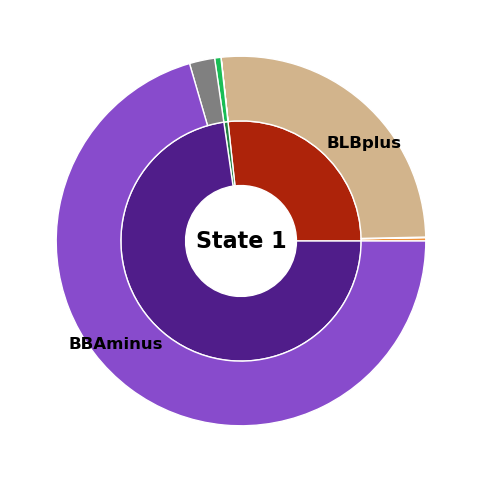

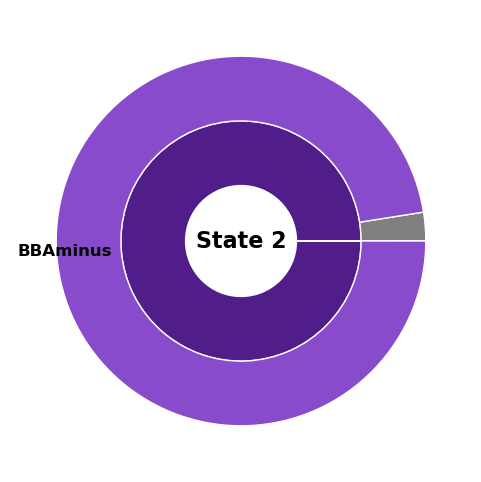

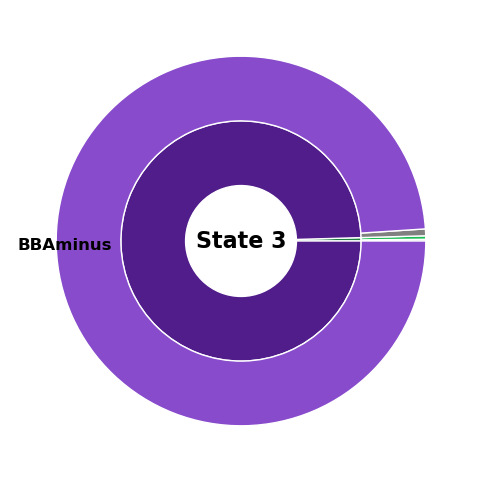

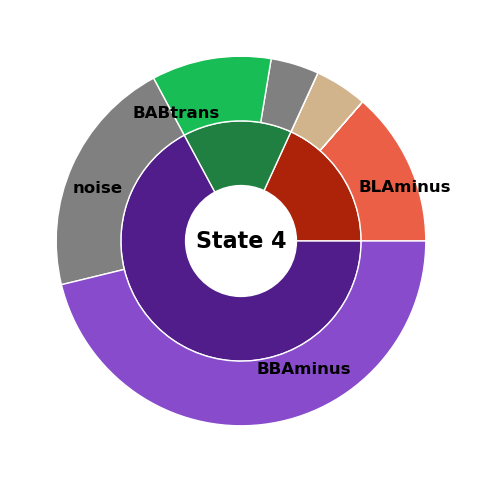

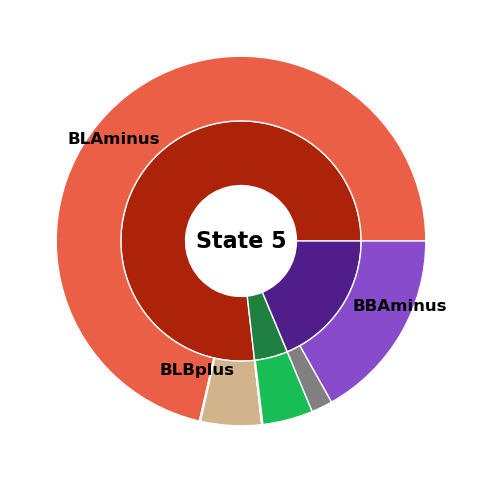

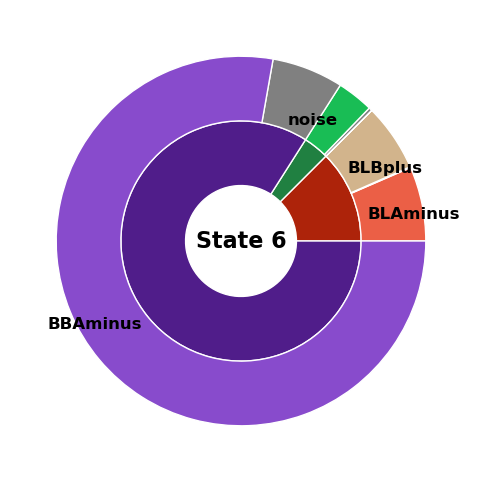

In [44]:
# Plot the Dunbrack state compostition for each macrostate
# Note - the color scheme haven't been changed yet
# They should match the palette used in VMD
# I also need to come up with a palette for Dunbrack states 

sim_ptraj_cat = np.array([study.micro_to_macro[d] if d in study.connected_states else -1 for d in study.dtraj_cat])

for state_i in range(study.pcca_n):
    frame_indices = np.where(sim_ptraj_cat == state_i)[0]
    spatial_assignments, dihed_assignments = distgroup_cat[frame_indices], dihedgroup_cat[frame_indices]
    
    spatial_counts, dihed_counts = dunbrack_count(spatial_assignments, dihed_assignments)
    plot_dihed_pie(spatial_counts, dihed_counts, 
                   radius_size=0.35, show_legend=False, show_clusters=True,
                   title=f'State {state_i+1}', 
                   savedir=study.fig_dir/f'state_{state_i+1}_dihed.svg')

### Coarse-grained transition matrix and MFPT

In [47]:
# Compute MFPT matrix

mfpt = np.zeros([study.pcca_n, study.pcca_n])
mfpt_std = np.zeros([study.pcca_n, study.pcca_n])

for i in range(study.pcca_n):
    for j in range(study.pcca_n):
        mfpt[i,j] = study.baymsm_mod.gather_stats('mfpt', A=study.pcca_mod.sets[i], B=study.pcca_mod.sets[j]).mean
        mfpt_std[i,j] = study.baymsm_mod.gather_stats('mfpt', A=study.pcca_mod.sets[i], B=study.pcca_mod.sets[j]).std

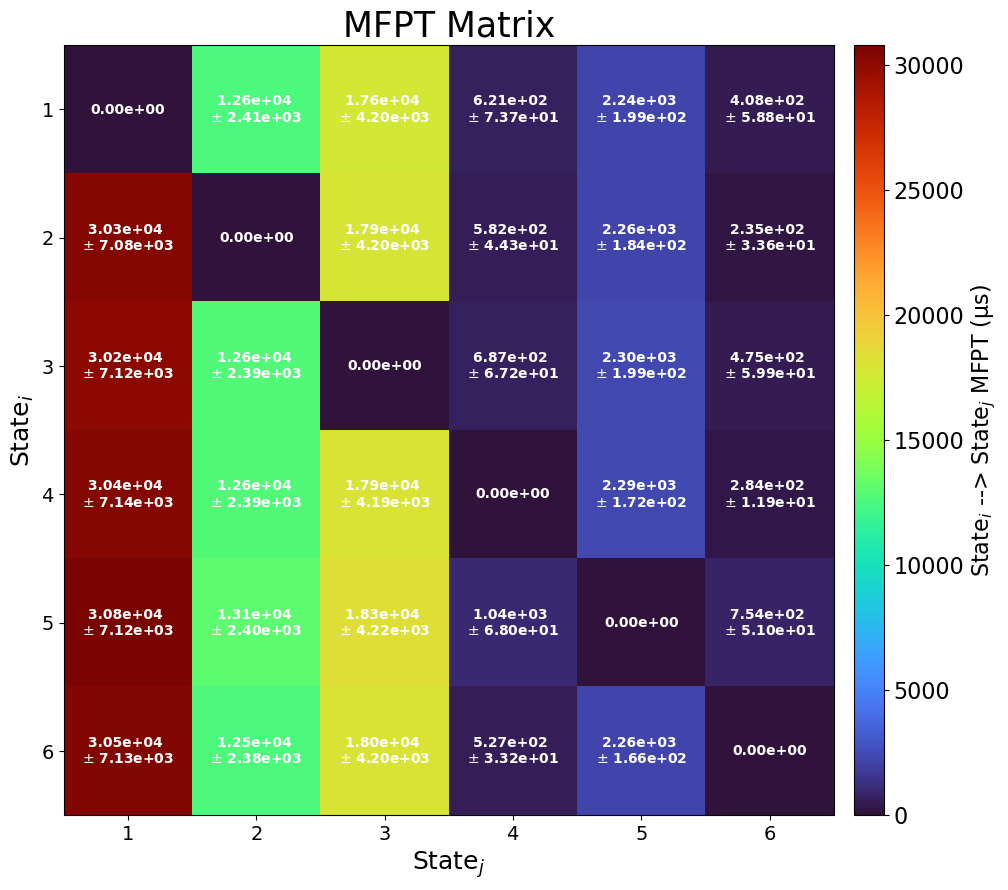

In [55]:
# MFPT matrix
plot_mfpt_matrix(mfpt = mfpt,
                 mfpt_err = mfpt_std, 
                 dt = study.hp_dict.dt_out,
                 text_f =".2e",
                 savedir = study.fig_dir/'mfpt_matrix.svg')

/home/rzhu/Desktop/projects/kinase_analysis/src/funcs_plotting.py:164: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(c_centers[pcca_assignment == i, dim_1], c_centers[pcca_assignment == i, dim_2],


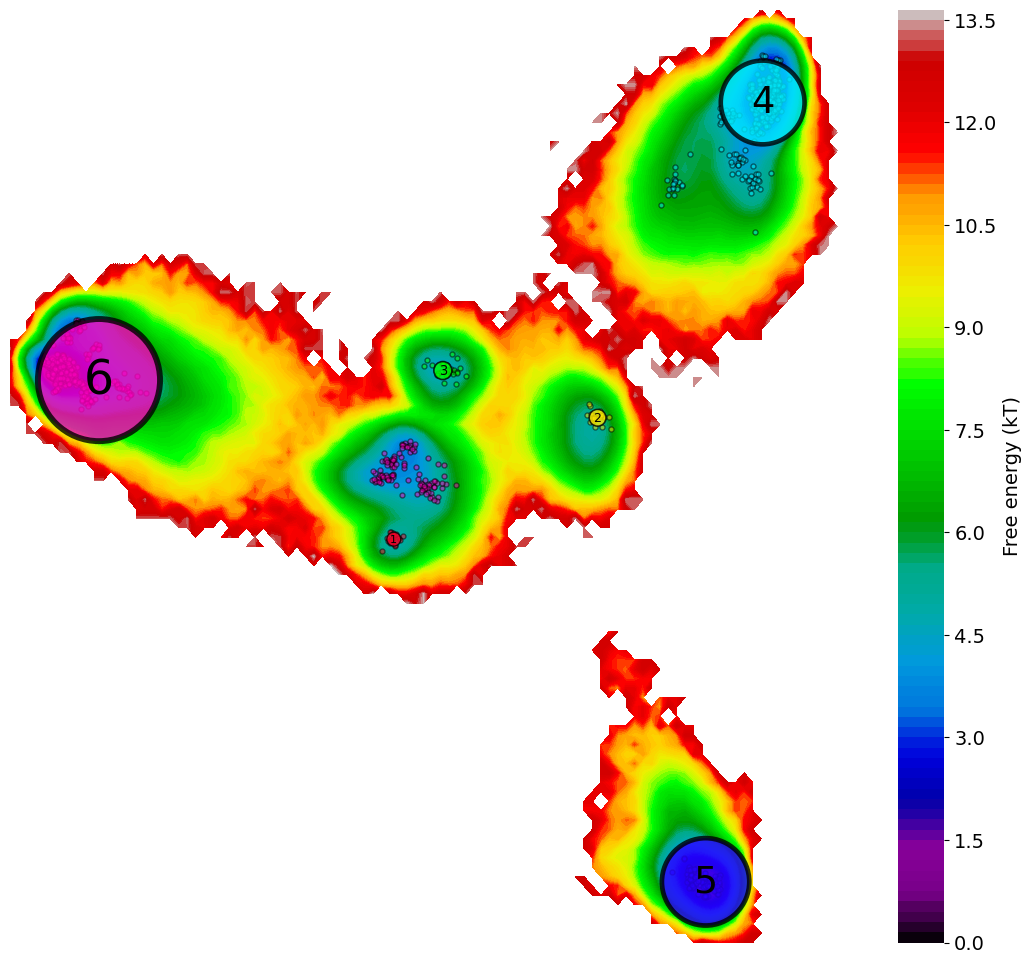

In [56]:
# MFPT graph 
plot_pcca_graph(traj_all = study.ttraj_cat,
                traj_weights = np.concatenate(study.traj_weights, axis=0),
                c_centers = study.kmeans_centers[study.connected_states, :],
                c_centers_a = 0.5,
                c_centers_s = 50,
                matrix = mfpt,
                pcca_assignment = study.pcca_mod.assignments,
                stat_dist = study.msm_mod.stationary_distribution,
                savedir = study.fig_dir/'mfpt_graph.svg')

### Eigenvectors

In [ ]:
# Plot the top 10 eigenvectors 
# The max and min are shown in red and blue respectively
for ev_id in range(10):
    plot_ev(ev = study.msm_mod.eigenvectors_right()[:,ev_id+1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                ],
            c_centers = study.kmeans_centers[study.connected_states,:],
            traj_all = study.ttraj_cat,
            traj_weights = np.concatenate(study.traj_weights,axis=0),
            title = f'eigenvector_{ev_id+2}',
            savedir = study.fig_dir/f'eigenvector_{ev_id+2}.svg')

### Sample pcca states and save examples

In [7]:
# Sample from each macrostate 
n_sample = 100
for pcca_state in range(study.pcca_n):
    samples = study.sample_from_macrostate(n_sample = n_sample,
                                           macrostate_id = pcca_state,
                                           ci_cutoff = 0.8,
                                           weights ='equilibrium')  # weights based on stationary distribution
    study.save_samples(samples, 
                       fname = study.sample_dir/f'macrostate_{pcca_state}_{n_sample}_samples.pdb',
                       save_ids=True)

/home/rzhu/Loc/miniconda3/envs/msm/lib/python3.10/site-packages/mdtraj/core/trajectory.py:441: UserWarning: top= kwargs ignored since this file parser does not support it
  warnings.warn("top= kwargs ignored since this file parser does not support it")


Saved samples to /home/rzhu/Desktop/projects/kinase_analysis/data/abl/msm/with_prior/4/samples/macrostate_0_100_samples.pdb
Saved samples to /home/rzhu/Desktop/projects/kinase_analysis/data/abl/msm/with_prior/4/samples/macrostate_1_100_samples.pdb
Saved samples to /home/rzhu/Desktop/projects/kinase_analysis/data/abl/msm/with_prior/4/samples/macrostate_2_100_samples.pdb
Saved samples to /home/rzhu/Desktop/projects/kinase_analysis/data/abl/msm/with_prior/4/samples/macrostate_3_100_samples.pdb
Saved samples to /home/rzhu/Desktop/projects/kinase_analysis/data/abl/msm/with_prior/4/samples/macrostate_4_100_samples.pdb
Saved samples to /home/rzhu/Desktop/projects/kinase_analysis/data/abl/msm/with_prior/4/samples/macrostate_5_100_samples.pdb


In [13]:
list(study.sample_dir.rglob('macrostate_*_samples.json'))

[PosixPath('/home/rzhu/Desktop/projects/kinase_analysis/data/abl/msm/with_prior/4/samples/macrostate_4_100_samples.json'),
 PosixPath('/home/rzhu/Desktop/projects/kinase_analysis/data/abl/msm/with_prior/4/samples/macrostate_5_100_samples.json'),
 PosixPath('/home/rzhu/Desktop/projects/kinase_analysis/data/abl/msm/with_prior/4/samples/macrostate_1_100_samples.json'),
 PosixPath('/home/rzhu/Desktop/projects/kinase_analysis/data/abl/msm/with_prior/4/samples/macrostate_0_100_samples.json'),
 PosixPath('/home/rzhu/Desktop/projects/kinase_analysis/data/abl/msm/with_prior/4/samples/macrostate_2_100_samples.json'),
 PosixPath('/home/rzhu/Desktop/projects/kinase_analysis/data/abl/msm/with_prior/4/samples/macrostate_3_100_samples.json')]

In [ ]:
# For Josh's writhe analysis
# I retrieve the transition matrix and the sub-matrix for the samples 
import json

np.save(study.sample_dir/'tmax.npy', study.msm_mod.transition_matrix)

dtrajs = []
for s_files in list(study.sample_dir.rglob('macrostate_*_samples.json')):
    samples = json.load(open(s_files, 'r'))
    for ftraj_id, frame_ids in samples.items():
        for frame_id in frame_ids:
            dtrajs.append(study.dtrajs[int(ftraj_id)][int(frame_id)])

sub_transition_matrix = study.msm_mod.transition_matrix[np.ix_(dtrajs, dtrajs)]
np.save(study.sample_dir/'sample_tmax.npy', sub_transition_matrix)

21786
16342
22457
11216
11995
28346
18991
15018
6211
10529
18815
32584
27927
26537
16416
26035
30399
24277
2083
18301
20763
24371
13553
27360
18308
17886
31031
23293
30115
15774
15486
16943
21297
6113
16119
29584
23001
12910
10325
18620
4944
1020
4537
11312
43
5118
12876
33412
28360
28080
2359
31870
23857
15546
40
7714
27619
28144
15803
866
11
8239
21780
1828
12922
29181
6187
15258
16043
28303
11238
18958
31907
5756
27065
2014
11584
3739
15695
211
28685
3832
6280
15488
7222
1378
12976
25289
17275
20426
10620
25249
3073
13667
17241
17139
2911
6690
23065
6815
35198
32546
27583
13096
6105
21212
3000
12732
27343
29125
4512
11106
35252
28007
21532
17550
30252
29324
22851
8272
27596
19170
972
24209
18346
22121
23901
9500
11257
12084
16672
22432
2558
20766
11774
4397
19455
6865
4681
2964
4479
26961
16778
27168
26442
18866
13448
20440
15853
18465
26449
17685
13822
26523
19396
29697
15478
17622
21035
19765
8477
16173
26004
28057
3471
17303
2896
33243
1707
17655
149
20553
23280
12124
21528
22518

In [ ]:
# # Save samples for ML analysis 

# dir = Path(f'/home/rzhu/Desktop/projects/kinase_analysis/data/{protein}/msm/markov_priors/samples_ml')
# dir.mkdir(parents=True, exist_ok=True)
# ref = md.load(crystal_files[0])
# ref = ref.atom_slice(ref.top.select('mass>1.1'))
# ref.save(dir/'ref.pdb')

# with open(dir/f'samples.txt', 'w') as f:
#     f.writelines(f'macrostate,microstate,traj_id,frame_id\n')

# for pcca_state in range(study.pcca_n):
#     membership_cutoff = 0.8  # Only sample microstates that are committed to a macrostate

#     memberships = study.pcca_mod.memberships[:,pcca_state]
#     states_to_sample = memberships > membership_cutoff

#     stationary_distribution = study.msm_mod.stationary_distribution.copy()
#     stationary_distribution[~states_to_sample] = 0
#     sample_distribution = stationary_distribution / np.sum(stationary_distribution)

#     state_samples_count = sample_states_by_distribution(sample_distribution, study.connected_states, 1000)
#     samples = sample_frames_by_states(state_samples_count, study.dtrajs, mapping=study.mapping)
#     print(state_samples_count) # Print what microstates are sampled and how many samples from each 

#     with open(dir/f'samples.txt', 'a') as f:
#         sample_id = 0        
#         for state, n_samples in state_samples_count.items():
#             for i in range(n_samples):
#                 f.writelines(f'{pcca_state+1},{state},{samples[sample_id][0]},{samples[sample_id][1]}\n')
#                 sample_id += 1
#     save_samples(samples, 
#                  TD.datasets['pdb-1ns']['rtraj_files'], 
#                  dir/f'MS_{pcca_state+1}.pdb',
#                  reference=ref)

### Sample pcca extreme states

In [ ]:
# This may still work but I will need to update using the new methods 

with open(study.sample_dir/f'samples_ex.txt', 'w') as f:
    f.writelines(f'macrostate,microstate,traj_id,frame_id\n')

for state_i in range(study.pcca_n):
    memberships = study.pcca_mod.memberships[:,state_i]

    state_samples_count = {study.connected_states[np.argmax(memberships)] : 1}
    samples = sample_frames_by_states(state_samples_count, study.dtrajs, mapping=study.mapping)
    print(state_samples_count) 

    with open(study.sample_dir/f'samples_ex.txt', 'a') as f:
        sample_id = 0        
        for state, n_samples in state_samples_count.items():
            for i in range(n_samples):
                f.writelines(f'{state_i+1},{state},{samples[sample_id][0]},{samples[sample_id][1]}\n')
                sample_id += 1
    save_samples(samples, 
                 TD.datasets['pdb-1ns']['rtraj_files'], 
                 study.sample_dir/f'MS_{state_i+1}_ex.pdb')

### Sample eigenvector extreme states

In [ ]:
# This may still work but I will need to update using the new methods 

n_samples = 20
with open(study.sample_dir/f'samples_eigen_extremes.txt', 'w') as f:
    f.writelines(f'eigenvector,microstate,traj_id,frame_id\n')

for ev_id in range(10):
    ev = study.msm_mod.eigenvectors_right()[:,ev_id+1]

    ev_min_sample_count = {study.connected_states[np.argmin(ev)] : n_samples}
    ev_max_sample_count = {study.connected_states[np.argmax(ev)] : n_samples}
    print(ev_min_sample_count, ev_max_sample_count)

    samples_min = sample_frames_by_states(ev_min_sample_count, study.dtrajs, mapping=study.mapping)
    samples_max = sample_frames_by_states(ev_max_sample_count, study.dtrajs, mapping=study.mapping)

    with open(study.sample_dir/f'samples_eigen_extremes.txt', 'a') as f:
        for (state_min, n_samples),(state_max, n_samples) in zip(ev_min_sample_count.items(),ev_max_sample_count.items()):
            for i in range(n_samples):
                f.writelines(f'{ev_id+2}_min,{state_min},{samples_min[i][0]},{samples_max[i][1]}\n')
                f.writelines(f'{ev_id+2}_max,{state_max},{samples_min[i][0]},{samples_max[i][1]}\n')

    save_samples(samples_min, 
                 TD.datasets['pdb-1ns']['rtraj_files'], 
                 study.sample_dir/f'ev_{ev_id+1}_min.pdb')
    save_samples(samples_max, 
                 TD.datasets['pdb-1ns']['rtraj_files'], 
                 study.sample_dir/f'ev_{ev_id+1}_max.pdb')


### The highest flux pathways and the bottleneck states

In [ ]:
# I find the macrostates that are most likely to be the active and inactive states
# according to the FES and Dunbrack state decomposition
# I use a confidence to filter out the some microstates. The value can be adjusted

inactive_ms_id = 5
active_ms_id = 4

start_state_ids = np.where(study.pcca_mod.memberships[:,inactive_ms_id] > 0.99)[0]
end_state_ids = np.where(study.pcca_mod.memberships[:,active_ms_id] > 0.99)[0]
print(start_state_ids, end_state_ids)

In [ ]:
# Compute the tpt pathways 
tpt_activation = study.msm_mod.reactive_flux(start_state_ids, end_state_ids)
paths, pathfluxes = tpt_activation.pathways(fraction=1.0)

Identify the pathway with the highest flux

In [ ]:
max_flux_index = np.argmax(pathfluxes)
highest_flux_pathway = paths[max_flux_index]
highest_flux_value = pathfluxes[max_flux_index]
print('States in the highest flux pathway:', highest_flux_pathway)

Identify the minimum flux transition (the bottleneck states)

In [ ]:
path_fluxes = [tpt_activation.net_flux[highest_flux_pathway[i], highest_flux_pathway[i+1]]
               for i in range(len(highest_flux_pathway) - 1)]
bottleneck_index = np.argmin(path_fluxes)
bottleneck_state = highest_flux_pathway[bottleneck_index]
bottleneck_flux_value = path_fluxes[bottleneck_index]
print('Index of the bottleneck state:', bottleneck_index)

Generate samples from the highest flux trajectory.

In [ ]:
samples = simulated_traj_to_samples(highest_flux_pathway, study.dtrajs, mapping=None)

np.save(study.sample_dir/'highest_flux_traj_ids.npy', samples)

In [ ]:
cmap = plt.get_cmap('binary')
colors = cmap(np.linspace(0, 1, len(highest_flux_pathway)))

plot_fe(traj_all = study.ttraj_cat,
        traj_weights = np.concatenate(study.traj_weights, axis=0),
        c_centers = study.kmeans_centers[highest_flux_pathway, :],
        c_centers_c = colors,
        c_centers_marker = 'o',
        c_centers_a = 1,
        c_centers_s = 50,
        linewidth = 1,
        title = f'Highest flux pathway (flux = {highest_flux_value:.2e})',
        savedir= study.fig_dir/'highest_flux_path.svg')

In [ ]:
index_states = compute_index_states(study.dtrajs)
snapshot_ids = [index_states[state] for state in highest_flux_pathway]
state_dihedgroup_counts = []
for i in range(len(highest_flux_pathway)):
    assignment = np.concatenate([dihedgroup[id[0]][id[1]] for id in snapshot_ids[i]])
    counts = [np.count_nonzero([assignment == i]) for i in range(-1, 8)]
    state_dihedgroup_counts.append(counts)
dihedgroup_state_counts = np.array(state_dihedgroup_counts).T

In [ ]:
# Again I will need to update the color scheme 

x = list(range(len(highest_flux_pathway)))
dihed_colors = np.array([
                    (128/255, 128/255, 128/255),   # Gray
                    (235/255, 95/255, 70/255),     # Light Red
                    (240/255, 146/255, 58/255),    # Flamebright
                    (255/255, 214/255, 92/255),    # Light yellow
                    (255/255, 188/255, 214/255),   # Light pink
                    (210/255, 180/255, 140/255),   # Tan
                    (196/255, 79/255, 108/255),    # Strawberry
                    (25/255, 189/255, 85/255),     # Light Green
                    (136/255, 75/255, 204/255)])   # Light Purple
labels = ['noise', 'BLAminus', 'BLAplus', 'ABAminus', 'BLBminus', 'BLBplus', 'BLBtrans', 'BABtrans', 'BBAminus']

width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(len(highest_flux_pathway))
y = 0

for group_name, group_count, color in zip(labels, dihedgroup_state_counts, dihed_colors):
    p = ax.bar(x, group_count, width, label=group_name, bottom=bottom, color=color)
    y += p[bottleneck_index].get_height()
    bottom += group_count
print(y)
x = p[bottleneck_index].get_x() + p[bottleneck_index].get_width() / 2
ax.text(x, y*0.9, '*', ha='center', va='bottom', fontsize=25, color='k')
ax.annotate("Bottleneck", (x, y), xytext=(x, y*1.2),
            ha='center', color='k', fontsize=12)

ax.set_yticks([0, 20000, 40000, 60000, 80000])
ax.set_ylabel('Count')
ax.set_xlabel('Highest flux pathway state')
ax.legend(loc="upper left", fontsize=10)

plt.savefig(study.fig_dir/'highest_flux_pathway_bottleneck_state.svg', transparent=True, bbox_inches='tight', dpi=300)
plt.show()

In [ ]:
TD.load_ftrajs(key=key,
               feature_names=['dbdist', 'dbdihed'],)
dbdist, _ = TD.get_ftrajs(keys=key, 
                             dt_out=1, 
                             internal_names=['dbdist'], 
                             time_cutoff=0,
                             convert_dihed_ids=None)
dbdihed, _ = TD.get_ftrajs(keys=key, 
                              dt_out=1, 
                              internal_names=['dbdihed'], 
                              time_cutoff=0,
                              convert_dihed_ids=None)

In [ ]:
# Load the dihedral cluster centroids for reference
# I will need to use the hdbscan centroids instead 

dihed_centroids_f = data_path / f'{protein}' / 'cluster_centers' / 'dfg_dihed_centroids.npy'
dihed_centroids = np.load(dihed_centroids_f, allow_pickle=True).item()
dihed_centroids = np.concatenate([dihed_centroids['dfg-in'], dihed_centroids['dfg-inter'], dihed_centroids['dfg-out']])

In [ ]:
# Load the spatial cluster centroids for reference
# Again use hdbscan 

spatial_centroids_f = data_path / f'{protein}' / 'cluster_centers' / 'dfg_spatial_centroids.npy'
spatial_centroids = np.load(spatial_centroids_f, allow_pickle=True)

spatial_colors = np.array([
(173/255, 35/255, 10/255),   # Red
(28/225, 128/255, 65/255),   # Green
(80/255, 29/255, 138/255)])  # Purple

In [ ]:
index_states = compute_index_states(study.dtrajs)

nrows = len(highest_flux_pathway)
ncols = 5
ax_size = 0.15

fig = plt.figure(figsize=(14, 14))
axes = []

# Create axes and set ticks and ticklabels 
for i in range(nrows):
    new_row_axes = []
    new_row_axes.append(fig.add_axes([0.10,           1-(i+1)*ax_size, ax_size, ax_size]))
    new_row_axes.append(fig.add_axes([0.18+ax_size,   1-(i+1)*ax_size, ax_size, ax_size]))
    new_row_axes.append(fig.add_axes([0.18+2*ax_size, 1-(i+1)*ax_size, ax_size, ax_size]))
    new_row_axes.append(fig.add_axes([0.18+3*ax_size, 1-(i+1)*ax_size, ax_size, ax_size]))
    new_row_axes.append(fig.add_axes([0.26+4*ax_size, 1-(i+1)*ax_size, ax_size, ax_size]))
    
    for ax in new_row_axes:
        ax.tick_params(left=False, bottom=False, labelbottom=False, labelleft=False)
    new_row_axes[0].tick_params(left=True, bottom=False, labelbottom=False, labelleft=True)
    new_row_axes[1].tick_params(left=True, bottom=False, labelbottom=False, labelleft=True)
    new_row_axes[-1].tick_params(left=True, bottom=False, labelbottom=False, labelleft=True)

    axes.append(new_row_axes)

axes[-1][0].tick_params(left=True,  bottom=True, labelbottom=True, labelleft=True)
axes[-1][1].tick_params(left=True,  bottom=True, labelbottom=True, labelleft=True)
axes[-1][2].tick_params(left=False, bottom=True, labelbottom=True, labelleft=False)
axes[-1][3].tick_params(left=False, bottom=True, labelbottom=True, labelleft=False)
axes[-1][4].tick_params(left=True,  bottom=True, labelbottom=True, labelleft=True)

# Plot data by row 
for i in range(nrows):
    snapshot_ids = index_states[highest_flux_pathway[i]]
    distances = np.array([dbdist[id[0]][id[1]] for id in snapshot_ids])
    # axes[i][0].scatter(distances[:,0], distances[:,1], s=1)
    sns.kdeplot(x=distances[:,0], y=distances[:,1], ax=axes[i][0], levels=5, zorder=1)
    axes[i][0].scatter(spatial_centroids[:,0], spatial_centroids[:,1], color=spatial_colors, marker='X', s=40, zorder=2)
    axes[i][0].set_xlim([0.0, 2.2])
    axes[i][0].set_ylim([0.0, 2.2])
    axes[i][0].set_ylabel('d2 (nm)')
    axes[i][0].set_yticks([0.75, 1.5])
    axes[i][0].set_xticks([0.75, 1.5])
    if i == nrows-1: axes[i][0].set_xlabel('d1 (nm)')
    axes[i][0].grid(color='gray', linestyle=':', alpha=0.7)

    dihedrals = np.array([dbdihed[id[0]][id[1]] for id in snapshot_ids])
    # axes[i][1].scatter(dihedrals[:,0], dihedrals[:,1], s=1)
    # axes[i][2].scatter(dihedrals[:,2], dihedrals[:,3], s=1)
    # axes[i][3].scatter(dihedrals[:,4], dihedrals[:,5], s=1)
    sns.kdeplot(x=dihedrals[:,0], y=dihedrals[:,1], ax=axes[i][1], levels=5, zorder=1)
    sns.kdeplot(x=dihedrals[:,2], y=dihedrals[:,3], ax=axes[i][2], levels=5, zorder=1)
    sns.kdeplot(x=dihedrals[:,4], y=dihedrals[:,5], ax=axes[i][3], levels=5, zorder=1)
    axes[i][1].scatter(dihed_centroids[:,0], dihed_centroids[:,1], color=dihed_colors[1:], marker='X', s=35, zorder=2)
    axes[i][2].scatter(dihed_centroids[:,2], dihed_centroids[:,3], color=dihed_colors[1:], marker='X', s=35, zorder=2)
    axes[i][3].scatter(dihed_centroids[:,4], dihed_centroids[:,5], color=dihed_colors[1:], marker='X', s=35, zorder=2)

    for ax in axes[i][1:4]:
        ax.set_xlim([-np.pi, np.pi])
        ax.set_ylim([-np.pi, np.pi])
        ax.set_xticks([-np.pi/2, 0, np.pi/2])
        ax.set_yticks([-np.pi/2, 0, np.pi/2])
        ax.set_xticklabels([r'-$\pi$/2', '0', r'$\pi$/2'])
        ax.set_yticklabels([r'-$\pi$/2', '0', r'$\pi$/2'])
        if i==nrows-1: 
            ax.set_xlabel('Phi')
        ax.grid(color='gray', linestyle=':', alpha=0.7)

    axes[i][1].set_ylabel('Psi')
    if i == 0: 
        axes[i][1].set_title('X-DFG')
        axes[i][2].set_title('DFG-D')
        axes[i][3].set_title('DFG-F')

    axes[i][4].hist(dihedrals[:,8], bins=36)
    for j in range(dihed_centroids.shape[1]):
        axes[i][4].axvline(x=dihed_centroids[j,6], ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], 
                           color=dihed_colors[1:][j], alpha=0.9, linestyle='--', linewidth=2, zorder=2)
    axes[i][4].set_xlim([-np.pi, np.pi])
    if i == nrows-1: 
        axes[i][4].set_xlabel('Chi1')
        axes[i][4].set_xticks([-np.pi/2, 0, np.pi/2])
        axes[i][4].set_xticklabels([r'-$\pi$/2', '0', r'$\pi$/2'])
    if i == 0: axes[i][4].set_title('DFG-F')

plt.savefig(study.fig_dir/'highest_flux_pathway_dfg_feature_shift.svg', transparent=True, bbox_inches='tight', dpi=300)
plt.show()